# Importing libraries and the data

First, we import all relevant libraries

In [1]:
pip install kagglehub pandas scikit-learn matplotlib seaborn numpy xgboost tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 957.8 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 40.6 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 32.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.1 MB/

In [32]:
import kagglehub
import pandas as pd
from sklearn.datasets import make_classification
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

Here we import the dataset using the kaggle API

In [3]:
#Download dataset
path = kagglehub.dataset_download("adilshamim8/predict-students-dropout-and-academic-success")
print("Downloaded path:", path)

csv_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

# Print all CSV file paths to check if there are more than one potentially relevant file in the dataset
for f in csv_files:
    print("CSV File:", f)


100%|██████████| 104k/104k [00:00<00:00, 549kB/s]

Extracting files...


Downloaded path: /home/ucloud/.cache/kagglehub/datasets/adilshamim8/predict-students-dropout-and-academic-success/versions/1
CSV File: /home/ucloud/.cache/kagglehub/datasets/adilshamim8/predict-students-dropout-and-academic-success/versions/1/students_dropout_academic_success.csv


In [4]:
df_raw = pd.read_csv(csv_files[0])
print("Loaded:", csv_files[0])

df_raw.head()

Loaded: /home/ucloud/.cache/kagglehub/datasets/adilshamim8/predict-students-dropout-and-academic-success/versions/1/students_dropout_academic_success.csv


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Describing the data in detail

# Data Cleaning and EDA

In [5]:
print(df_raw.info())
print("Shape:", df_raw.shape)
print("Columns:", df_raw.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
#print all categorical columns
print("Categorical columns:")
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        print(col)
#print unique values in each categorical column
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        print(f"{col}: {df_raw[col].unique()}")

Categorical columns:
target
target: ['Dropout' 'Graduate' 'Enrolled']


From the overview above we see that we have a shape of 4424, 37, which means that we have 37 columns/variables and 4424 observations.

Furthermore, we see that there are no null-values, which is due to the fact that the data has been precleaned to a large extent by the publishers of the data. Therefore, we do not need to perform any data cleaning operations in terms of dropping null values or using imputing techniques. The data has also been processed in terms of encoding categorical variables into numerical ones, such as 'gender' that has been encoded into 1's (male) and 0's (female).

Furthermore, we see that all our variables/columns are either of the type "interger" or "float", thus, numerical, expect our target variable which contains 3 unique categorical values that can be mentioned as 'Dropout', 'Gradute' or 'Enrolled'. 

Thus, this suggest a 3 class classification task, since we want to make the best predictions for whether a student will end up dropping out, graduate or have the status of being enrolled. However, the "enrolled" variable represents students that are simply enrolled in the univerity and has not yet dropped out or graduated and the "enrolled"-class within the target variable therefore does not have much relevance for our analysis. However, we cannot disregard it if it represents a large proportion of our data since this would result in a small dataset, unsuitable, for modelling.

Thus, we shall investigate how balanced our dataset is by considering the distribution of the target variable

Target variable distribution:
target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


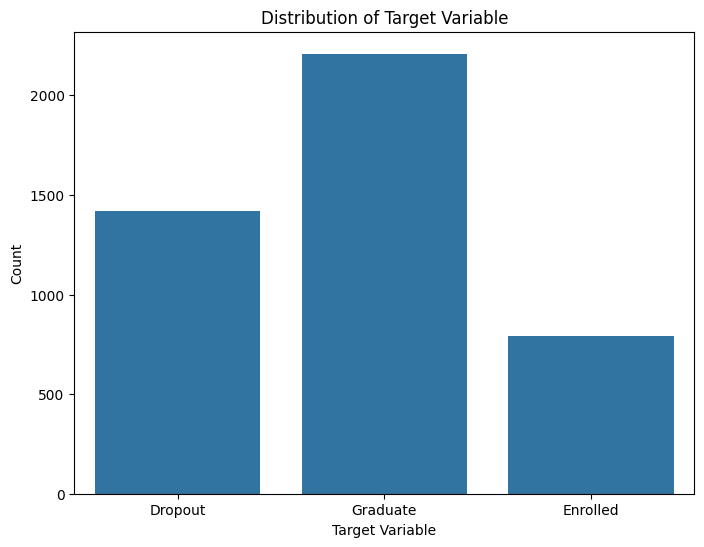

In [7]:
#print distribution of target variable
print("Target variable distribution:")
print(df_raw['target'].value_counts(normalize=True))
#plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_raw)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

We see that the data is not very well balanced since we have a rather uneven proportion of students that graduate (49,9%) as oposed to students that dropout (32%) or are enrolled (17%). But since the enrolled variable only represents 17% of the data and is not relevant for our analysis we shall drop the rows where the student is "enrolled" to keep a obtain a focused and relevant analysis.

In [8]:
# Step 1: Filter out 'enrolled'
df_binary = df_raw[df_raw['target'].isin(['Dropout', 'Graduate'])].copy()

# Step 2: Map the remaining classes to numeric labels
df_binary['target'] = df_binary['target'].map({'Dropout': 0, 'Graduate': 1})


In [9]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

target
1    0.60854
0    0.39146
Name: proportion, dtype: float64


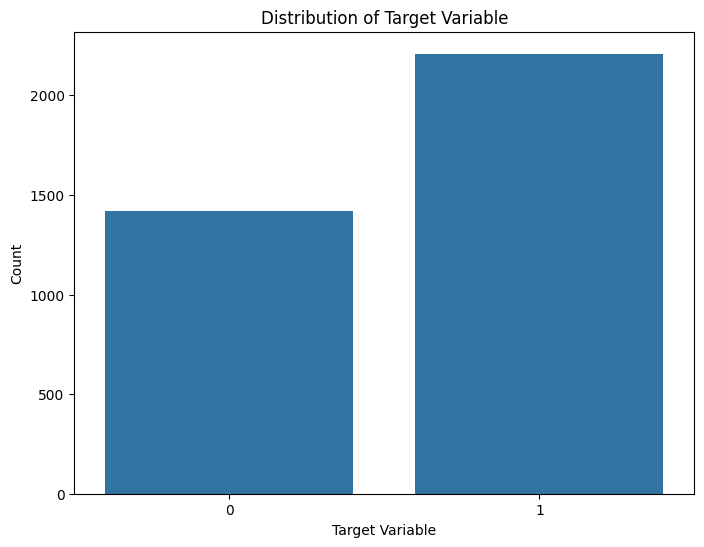

In [10]:
print(df_binary['target'].value_counts(normalize=True))
#plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_binary)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

After dropping the "enrolled" variable and performing an encoding of our target variable (1=Graduate , 0=Dropout), we have a balance of 60% Graduate's and 40% Dropout's. 

This class imbalance is VERY important to keep in mind, since our prediction models have a risk of being biased by favoiring the "graduate" target variable and achieving a high accuracy by simply going with the most frequent variable "graduate". Because of this, we will need to be very careful when using the accuracy metric as a measure for our models performance, and we should instead focus on the models precision/recall and F1 Score.

Lets check the correlation between our variables to see if there are any potential problematic correlations that we need to handle

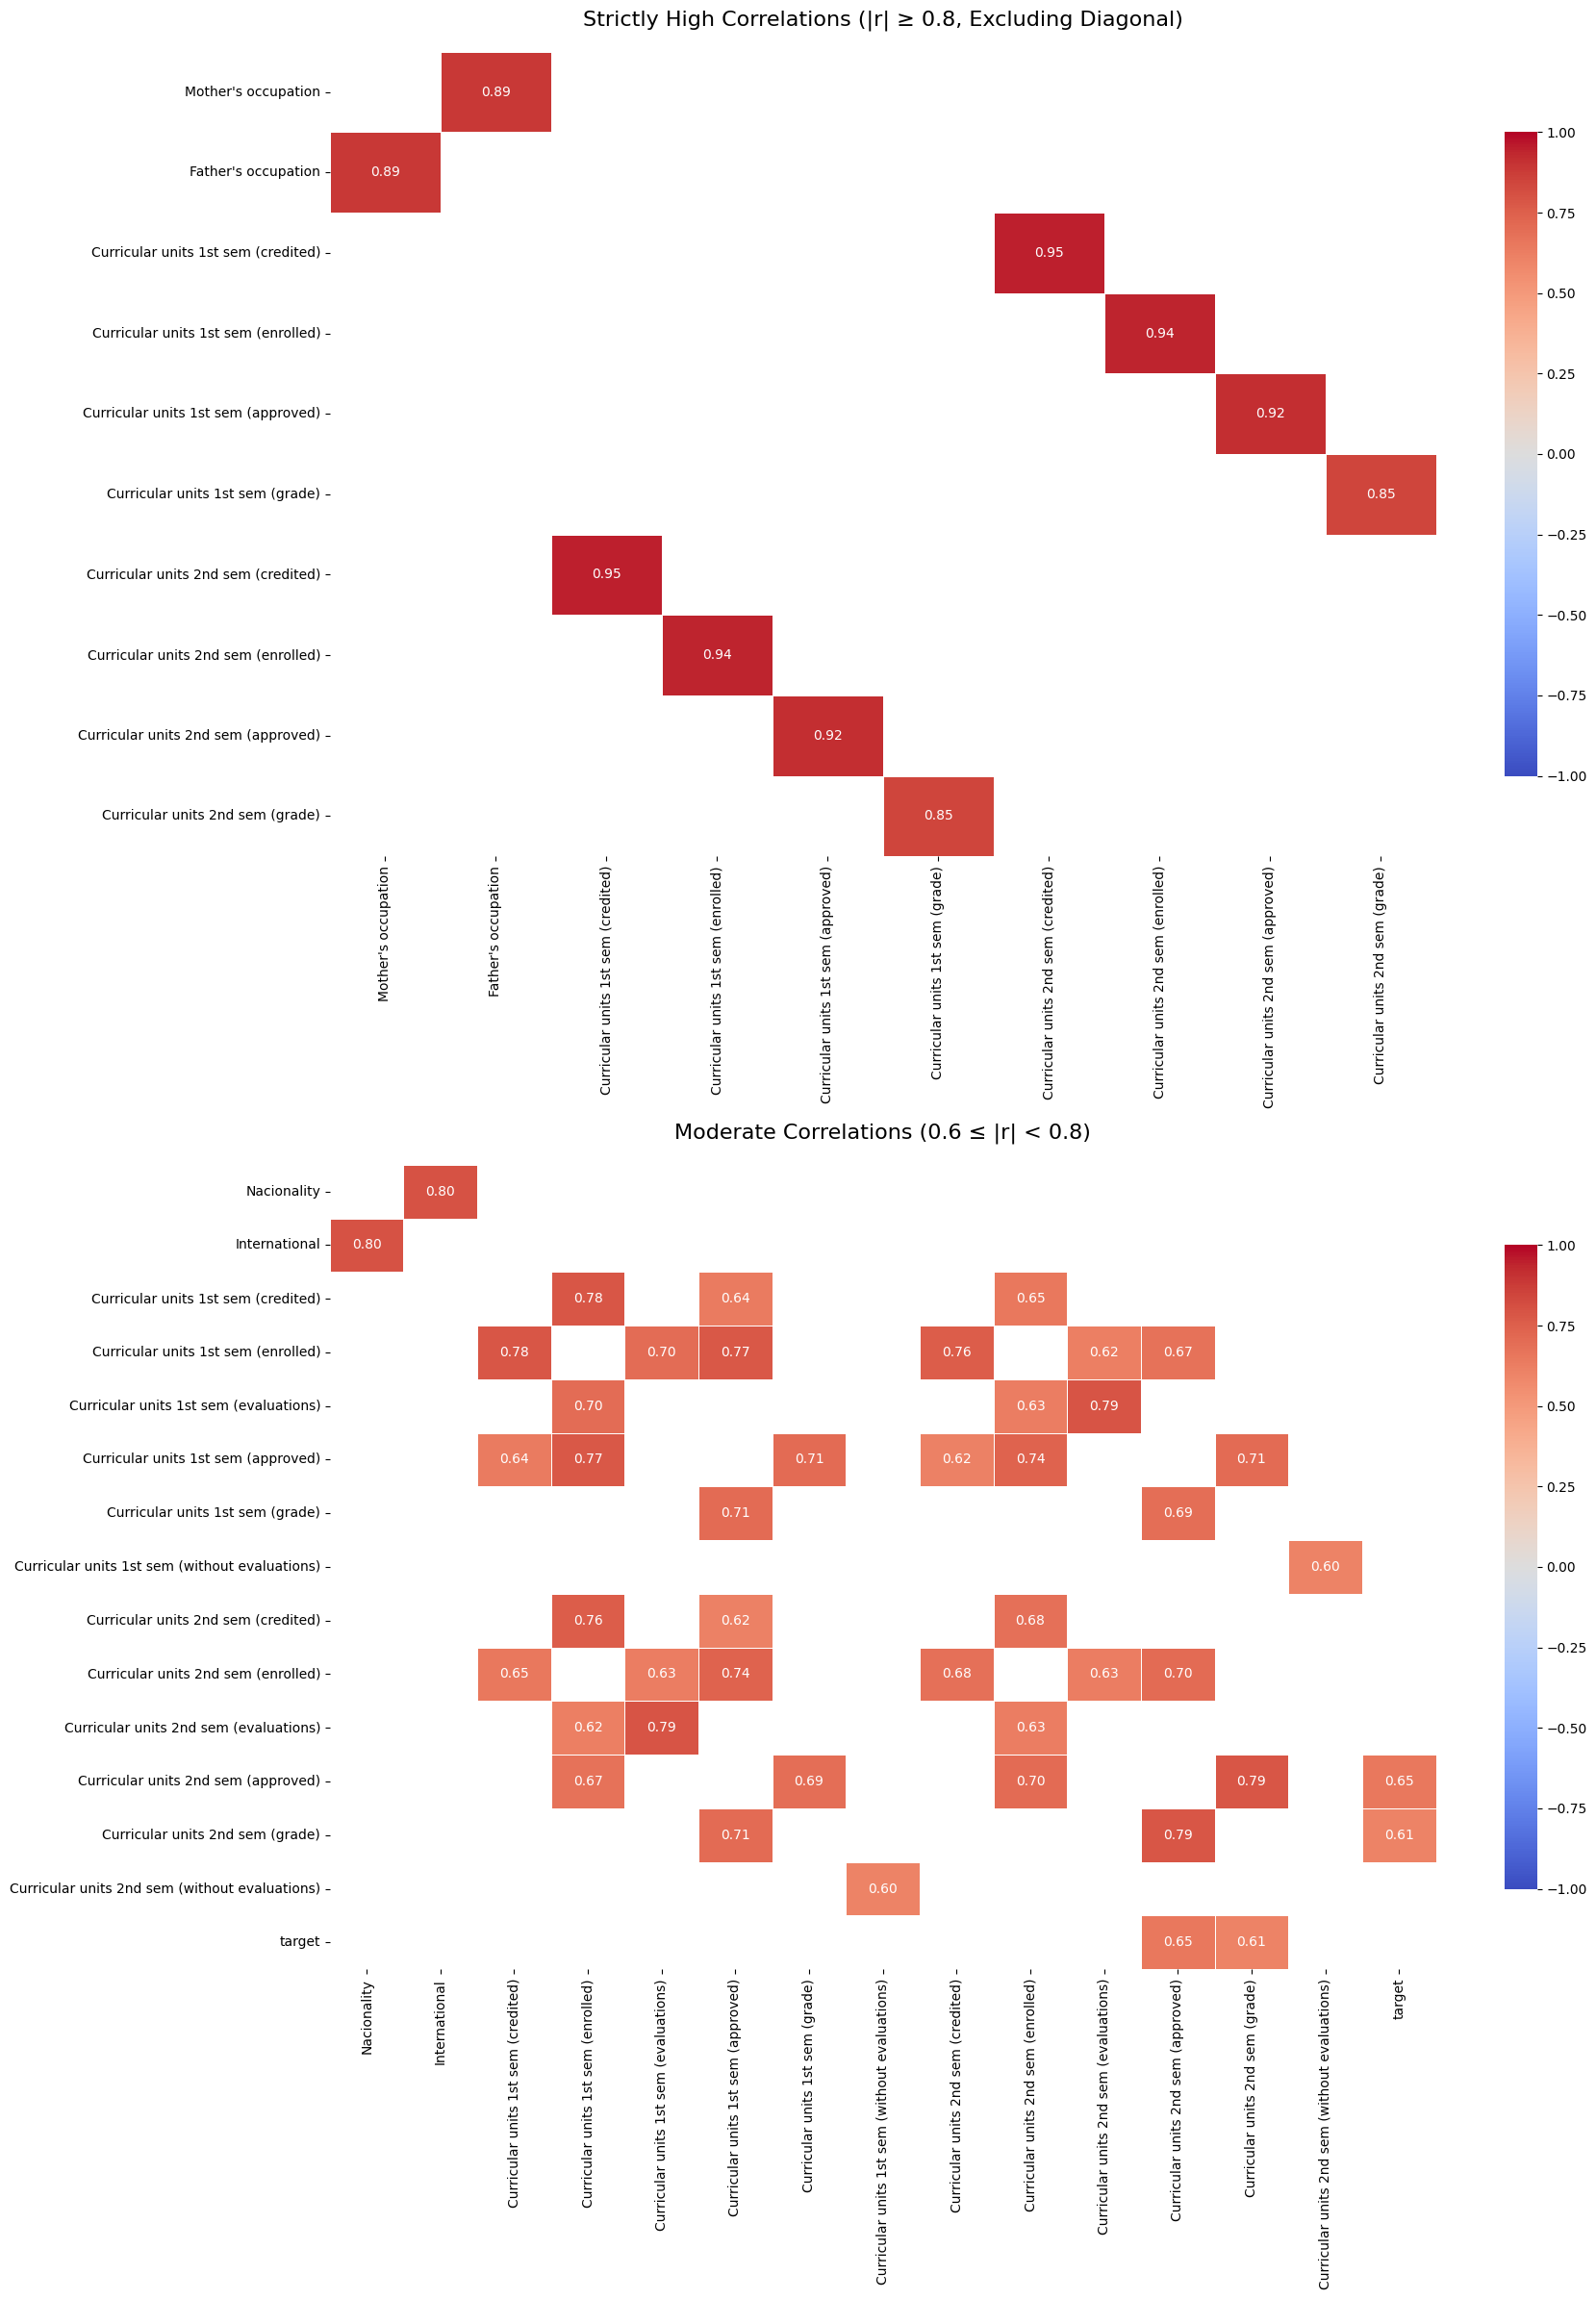

In [11]:
num_df = df_binary.select_dtypes(include=['int64', 'float64'])

correlation_matrix=num_df.corr()

corr_matrix = correlation_matrix.copy()


np.fill_diagonal(corr_matrix.values, np.nan)

# ≥0.8
high_corr = corr_matrix[corr_matrix.abs() >= 0.8]
high_corr_cleaned = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

#0.6≤r<0.8
mid_corr = corr_matrix[(corr_matrix.abs() >= 0.6) & (corr_matrix.abs() < 0.8)]
mid_corr_cleaned = mid_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')


plt.figure(figsize=(18, 24))

plt.subplot(2, 1, 1)
if not high_corr_cleaned.empty:
    sns.heatmap(high_corr_cleaned, annot=True, cmap="coolwarm",
                fmt=".2f", vmin=-1, vmax=1, linewidths=0.5,
                cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})
    plt.title('Strictly High Correlations (|r| ≥ 0.8, Excluding Diagonal)',
              fontsize=16, pad=20)
else:
    plt.text(0.5, 0.5, "No variables with |r| ≥ 0.8",
             ha='center', va='center', fontsize=16)
    plt.title('No High Correlations Found', fontsize=16)


plt.subplot(2, 1, 2)
if not mid_corr_cleaned.empty:
    sns.heatmap(mid_corr_cleaned, annot=True, cmap="coolwarm",
                fmt=".2f", vmin=-1, vmax=1, linewidths=0.5,
                cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})
    plt.title('Moderate Correlations (0.6 ≤ |r| < 0.8)',
              fontsize=16, pad=20)
else:
    plt.text(0.5, 0.5, "No variables with 0.6 ≤ |r| < 0.8",
             ha='center', va='center', fontsize=16)
    plt.title('No Moderate Correlations Found', fontsize=16)

plt.tight_layout()
plt.show()

# Handling variables with multicolinearity

Based on the correlation matrix above we see that there is an extremely high correlation between curricular units (1st semester) and curricular units (2nd semester), and the 3 types of curicular units (enrolled, evaluatations and approved). The variables containing curicular units that has evaluations seems unecessary since it highly resembles that variables containing curicular units that has been approved. Becuase of this we will drop the two variables containing curricular units that has evaluations and instead keep the curricular units that has been approved.

Furthermore, the variables for curricular units are shown both for 1st semester and for 2nd semester and due to the fact that they are highly correlated we will combine them into averages since we do not want two variables that are containing very similar information. Thus, we will create averages between 1st and 2nd semester for the grades and curricular units that has been enrolled and approved. 

There is also a very high correlation between father's occupation and mother's occupation, and these are encoded variables representing a profession, which makes it unfeasible to construct a new variable based on the two. Instead we will simply drop mother's occupation and state that father's occupation contains the information that mother's occupation is also providing to the model.

In [12]:
df_binary.columns.tolist()

['Marital Status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [13]:
def construct_averages(df_binary):
    #Create new averaged columns
    result = {}
    result["grade_average"] = (
        df_binary["Curricular units 1st sem (grade)"] + df_binary["Curricular units 2nd sem (grade)"]
    ) / 2
    result["approved_average"] = (
        df_binary["Curricular units 1st sem (approved)"] + df_binary["Curricular units 2nd sem (approved)"]
    ) / 2
    result["evaluations_average"] = (
        df_binary["Curricular units 1st sem (evaluations)"] + df_binary["Curricular units 2nd sem (evaluations)"]
    )
    result["credited_average"] = (
        df_binary["Curricular units 1st sem (credited)"] + df_binary["Curricular units 2nd sem (credited)"]
    ) / 2

    #Convert the new features to a DataFrame
    new_df = pd.DataFrame(result, index=df_binary.index)  # Ensure row alignment

    #Drop the original columns
    df_modified = df_binary.drop(columns=[
        "Curricular units 1st sem (approved)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 2nd sem (without evaluations)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 1st sem (credited)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 1st sem (grade)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 2nd sem (evaluations)",
        "Mother's occupation",
    ])

    #Concatenate new features
    df_modified = pd.concat([df_modified, new_df], axis=1)

    return df_modified



In [14]:
# Apply the transformation and overwrite the original DataFrame
df_binary = construct_averages(df_binary)


In [15]:
print(print(df_binary.columns.tolist()))
print(df_binary.info(verbose=True))

['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'target', 'grade_average', 'approved_average', 'evaluations_average', 'credited_average']
None
<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital Status                  3630 non-null   int64  
 1   Application mode                3630 non-null   int64  
 2   Application order               3630 non-null   int64  
 3   Course                       

# Partioning data and reducing dimensionality

Now that we have performed our EDA and preprocessing steps we are ready to start preparing for setting up our baseline model. For this we first want to use k-folds cross validation instead of splitting our data into a test, validation and training set. This is due to the fact that our data set is medium sized and we can afford a longer computing time in a trade off for higher reliability and less chance of overfitting the data.

When performing the k-fold cross validation it is important to keep in mind that our data is imbalanced. Because of this we utilise the "stratify" method that is build in to the scikit learn packages. This ensures that we get the same proportions of our categorical target variable in each k-fold as the proportion is in the original data. 

Based on the k-fold cross validation we then want to perform dimensionality reduction where we extract only the most important features of our model since 27 variables are not feasible to work with. The reason that we do the reduction in our k-fold loop is to avoid data leackage, meaning that we do not want to leak information from the validation set into the training process but instead keep these sets seperated and ensure a training process that does not overfit the data.

We shall use the random forrest method for reducing our dimensionality since we have a medium sized dataset and do not want to use a more complicated model such as XG boost. XG boost contains more hyperparameters and is therefore more tunable and can achieve higher accuracy, but this also runs a risk of overfitting the data if the parameters are not tuned correctly, and we deem that it would be overkill to use this model for a simple dimensionality reduction, and baseline. 

In [16]:
# Separate features and target
X = df_binary.drop("target", axis=1)  # Replace "target" with your column name
y = df_binary["target"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Train Random Forest on full training set and select top features
start_time = time.time()

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# 3. Get top 15 features by importance
importances = rf.feature_importances_
top_n = 15
top_features = X_train.columns[np.argsort(importances)[-top_n:]]

# 4. Reduce train and test sets based on selected features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# 5. Retrain model on reduced features
rf_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_final.fit(X_train_reduced, y_train)

y_pred = rf_final.predict(X_test_reduced)
end_time = time.time()
run_time_RF = end_time - start_time

Now that we have performed our dimensionality reduction and trained our data on the 15 most important variables we can do a quick visualisation of what those features actually are

Shape of reduced train set: (2904, 15)
Shape of reduced test set: (726, 15)


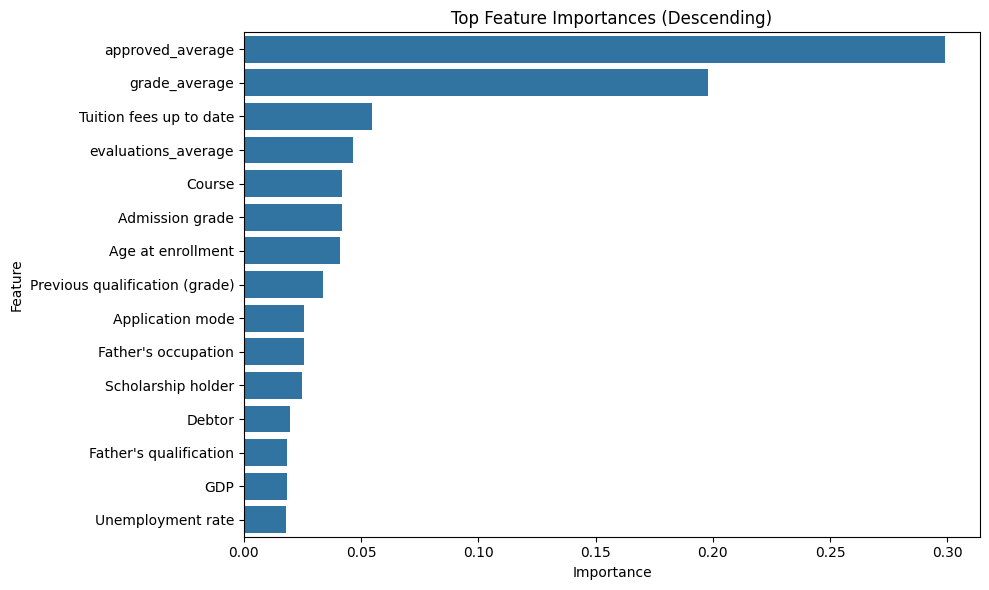

In [18]:
# We extract the top feature importances (sorted in descending order)
top_n = 15
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-top_n:][::-1]
top_features = X_train.columns[top_indices]
top_importances = importances[top_indices]

# We print shape of reduced datasets
print("Shape of reduced train set:", X_train[top_features].shape)
print("Shape of reduced test set:", X_test[top_features].shape)

# We visualize the top feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Top Feature Importances (Descending)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Lets plot the distributions of our most important variables to get a better understanding of how our data behaves

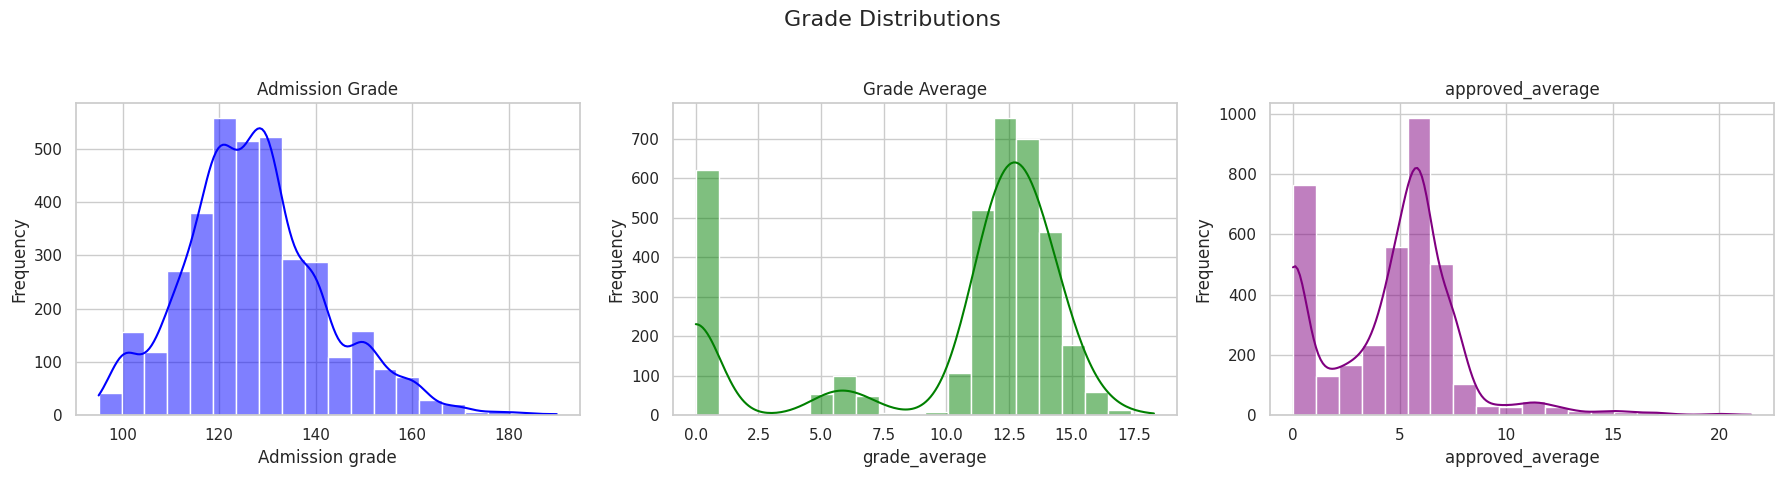

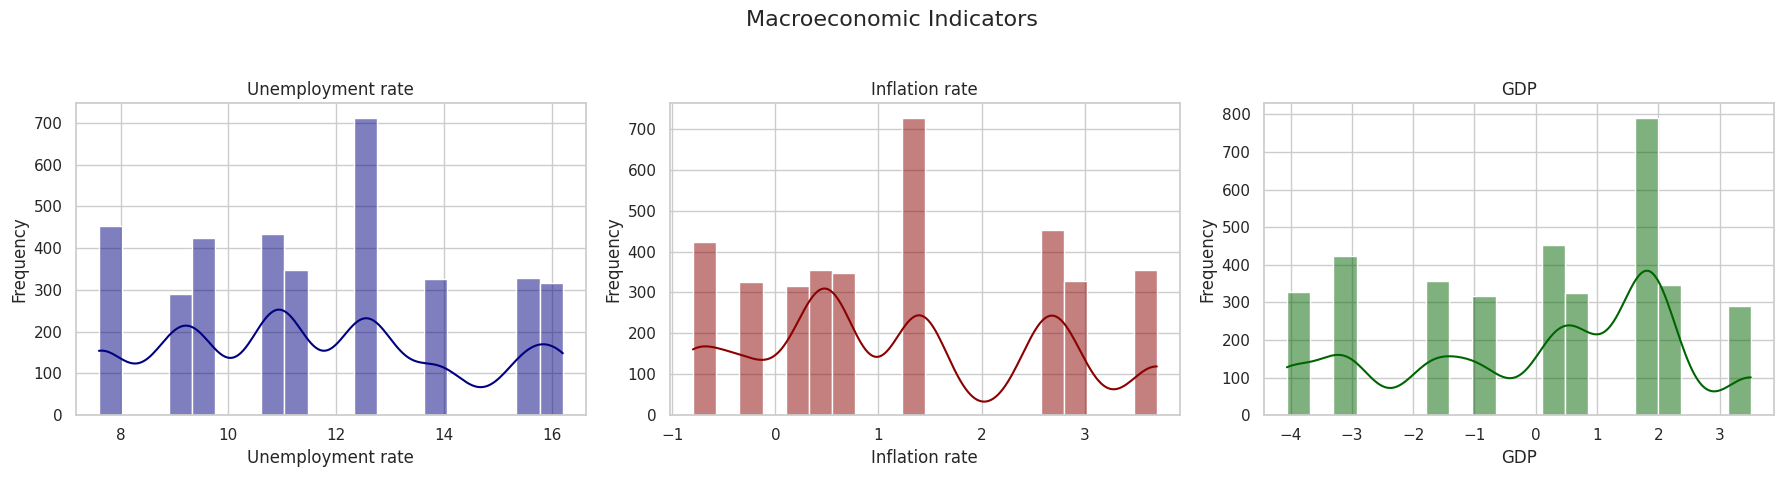

In [19]:
# Set seaborn style
sns.set(style="whitegrid")

# Define groups of numerical columns
grade_columns = [
    'Admission grade',
    'grade_average', 
    'approved_average',
]

# Define macroeconomic columns
macro_columns = [
    'Unemployment rate',
    'Inflation rate',
    'GDP']

# Plot function
def plot_columns(columns, titles, colors, suptitle):
    plt.figure(figsize=(6 * len(columns), 5))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.histplot(df_binary[col].dropna(), kde=True, color=colors[i], bins=20)
        plt.title(titles[i])
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.suptitle(suptitle, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Run visualizations for grades
plot_columns(
    grade_columns, 
    ["Admission Grade", "Grade Average", "approved_average"],  # You need to have matching titles
    ["blue", "green", "purple"],  # Ensure the colors match the number of columns
    "Grade Distributions"
)

# Run visualizations for macroeconomic indicators
plot_columns(
    macro_columns, 
    macro_columns,  # Titles can just be the column names themselves
    ["navy", "darkred", "darkgreen"], 
    "Macroeconomic Indicators"
)

From this we see that the most important features are the average of curricular units approved (1st and 2nd semester) as well as the average of the grades, which makes a lot of sense since this is a direct indication that the student has passed an important milestone towards graduating when having finished 2nd semester and the average of the grades that the student achieved during those two semesters will also have a high impact on the student's change of graduating.

We also see that the choosen course has a very high impact on the models as well as the age of the student at enrollment. Furthermore, we see that the students previous grade (before enrollment) plays a relatively important role, and that the father's occupation also seems to have an important impact. This suggest that there is an element of social herritage in the student's chances of graduating succesfully.

Furthermore, we see that macroeconomic factors (GDP, Inflation and unemployment rate) are factors that plays a role, and that the students ability to pay his/her students debts are also of importance.

Thus, academic performace (curricular units and grades), social herritage and macroeconomic- factors and debt are the most important features in the model.

Based on the reduced dimensionality we will now use the random forrest to make predictions and represent our baseline model

# Baseline Model

In [20]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.81      0.87       284
    Graduate       0.89      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



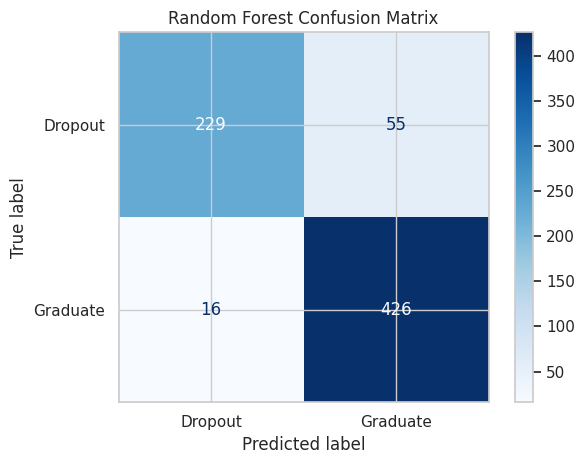

In [21]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Dropout", "Graduate"]
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

# Trying to outperform baseline model

We want to see if we can outperform the baseline model through more complex models. We shall first try to see if we can outperform the random forrest with an XG boost model, since XG boost allows for more tunning of the model and thus might give us a better change of improving the model through customization to our data

In [22]:
# We set up a train/test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# We compute sample weights for class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# We define a parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 6, 8],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.05, 0.1],
    'min_child_weight': [1, 2, 3, 4, 5, 7]  # Adjust this based on class imbalance
}

# We define the base model
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# We formulate the Cross-validation setup and grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()

# We fit grid search on training data
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

end_time = time.time() #measures run time

run_time_XG = end_time - start_time
print(f"XG Boost training time: {end_time - start_time:.2f} seconds")
# STEP 7: Evaluate best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


XG Boost training time: 209.60 seconds


In [23]:
importances = best_model.feature_importances_

feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Print top features
print(feat_df.reset_index(drop=True))

                           Feature  Importance
0                 approved_average    0.214554
1          Tuition fees up to date    0.136758
2                    grade_average    0.066314
3                           Debtor    0.049908
4               Scholarship holder    0.043565
5                           Course    0.042687
6              evaluations_average    0.033723
7                 credited_average    0.028481
8                           Gender    0.027895
9                 Application mode    0.026692
10      Daytime/evening attendance    0.025852
11                       Displaced    0.025185
12               Age at enrollment    0.024944
13  Previous qualification (grade)    0.022371
14                 Admission grade    0.022001
15               Application order    0.021419
16                             GDP    0.021159
17               Unemployment rate    0.021110
18                  Inflation rate    0.021094
19          Father's qualification    0.020401
20           

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.7}
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.92      0.83      0.87       284
    Graduate       0.90      0.95      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



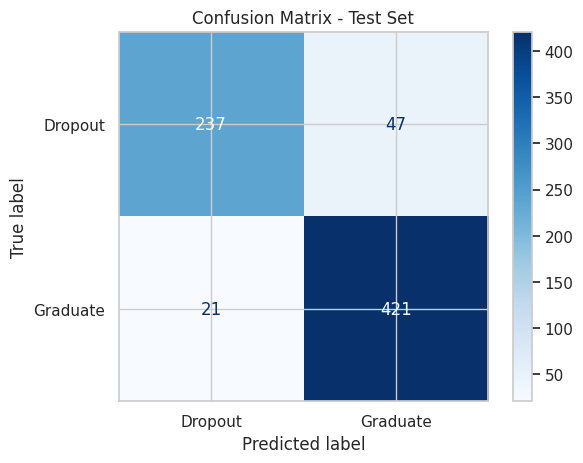

In [24]:
# Here we evaluate the final parameters of the model based on what the grid search found
print("Best Parameters:", grid_search.best_params_)

# Here we provide an overview of the performance metrics of the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

We will try to implement a multilayered perceptron deep neural network (MLP) to see if a model of high complexity can potentially give us better performance metrics than the random forrest.

For the MLP we shall use all the 27 variables and not the reduced dimensionality since we expect the hidden layers to learn about the most important features itself and thus a dimensionality reduction is not needed for this

First, we want to scale all of our truly numerical values to standardize them and simply pass through the variables that has represent a categorical value. Standardization of the numerical values are important for the neural network since it 

In [25]:
print(X.columns.tolist())

['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'grade_average', 'approved_average', 'evaluations_average', 'credited_average']


In [26]:
# Listing all the truly numerical features since we want to standardize these for our neural network
numerical_columns = ['Admission grade', 'Age at enrollment','Previous qualification (grade)',
                      'approved_average', 'grade_average', 'credited_average', 'Unemployment rate',
                      'Inflation rate', 'GDP'
                      ]

# These are already numeric but represent categorical data (leave as-is)
categorical_encoded_columns = [col for col in X.columns if col not in numerical_columns]


In [27]:
'''here we use a columtransformer pipeline to standardize the truly numerical features
and pass through the encoded numerical variables'''

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', 'passthrough', categorical_encoded_columns)
    ]
)

In [28]:
# Apply your existing column transformer
X_processed = preprocessor.fit_transform(X)

In [29]:
X_processed.shape

(3630, 27)

Here we perform our train and test split, and we use the stratify method to ensure that our split is being performed taking into account the class imbalance.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42
)


In [43]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(27,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

/home/ucloud/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) 
'''here we use early stopping to prevent overfitting and use validation loss to monitor the performance of the model
and stop the training when the validation loss does not improve for 10 epochs. The restore_best_weights=True
parameter ensures that the model weights are restored to the best epoch when training stops.'''

start_time = time.time()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

end_time = time.time()

run_time_MLP = end_time - start_time

print(f"MLP training time: {end_time - start_time:.2f} seconds")

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5886 - auc: 0.5579 - loss: 0.7149 - precision: 0.6325 - recall: 0.7766 - val_accuracy: 0.4628 - val_auc: 0.5393 - val_loss: 0.7001 - val_precision: 0.6032 - val_recall: 0.3439
Epoch 2/100
29/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6199 - auc: 0.5839 - loss: 0.6851 - precision: 0.6559 - recall: 0.8110

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6085 - auc: 0.5759 - loss: 0.6871 - precision: 0.6450 - recall: 0.8090 - val_accuracy: 0.5331 - val_auc: 0.5348 - val_loss: 0.7103 - val_precision: 0.6510 - val_recall: 0.5023
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6159 - auc: 0.5712 - loss: 0.6775 - precision: 0.6447 - recall: 0.8361 - val_accuracy: 0.3953 - val_auc: 0.4606 - val_loss: 0.7144 - val_precision: 0.5185 - val_recall: 0.0950
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5936 - auc: 0.5395 - loss: 0.6947 - precision: 0.6190 - recall: 0.8431 - val_accuracy: 0.6198 - val_auc: 0.5441 - val_loss: 0.6909 - val_precision: 0.6261 - val_recall: 0.9321
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6048 - auc: 0.5563 - loss: 0.6862 - precision: 0.6313 - recall: 0.8492 - val_accuracy: 0.6129 - val_auc: 0.5693 - val_loss: 0.6732 - val_precision: 0.6117 - val_recall: 0.9977
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

 1/23 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report (MLP):
              precision    recall  f1-score   support

     Dropout       0.96      0.68      0.80       284
    Graduate       0.83      0.98      0.90       442

    accuracy                           0.86       726
   macro avg       0.89      0.83      0.85       726
weighted avg       0.88      0.86      0.86       726



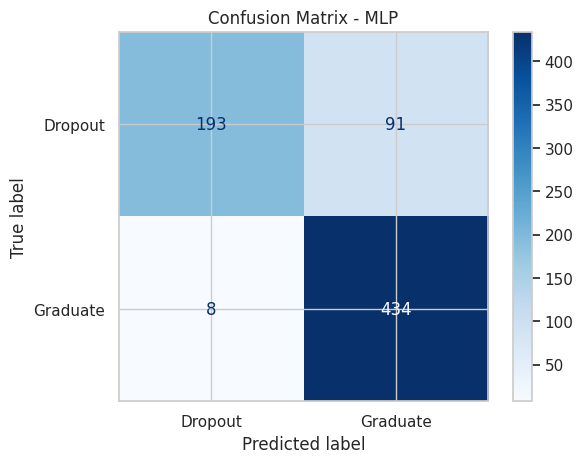

In [46]:
# Predict class probabilities and convert to binary predictions
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Classification report
print("\nClassification Report (MLP):")
print(classification_report(y_val, y_pred, target_names=['Dropout', 'Graduate']))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate']).plot(cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.show()


Now that we have run our 3 models let look into the run time of each model to get a better understanding of the computational power they require to supplement the discussions around model performance. Our XG boost model only slightly outperforms the Random Forrest, and in case the runtime is much more heavy, it does would not make sense to choose the XG Boost model since it does not perform well enough to justify the extra required computational power

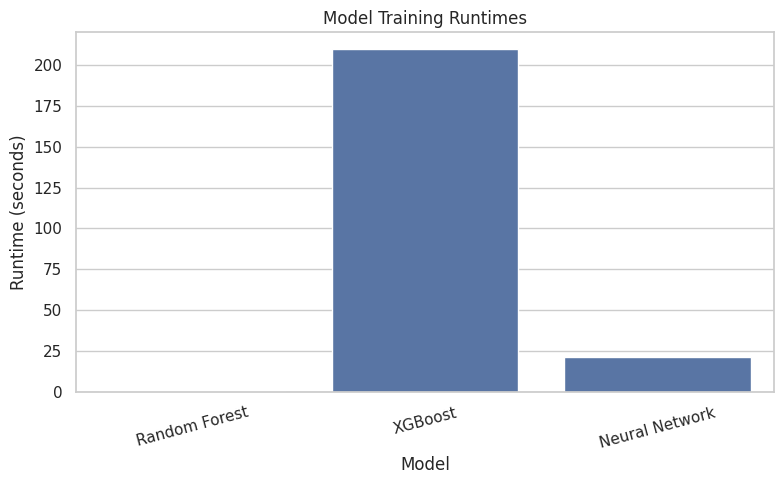

In [47]:
runtime_data = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Neural Network'],
    'Runtime (s)': [run_time_RF, run_time_XG, run_time_MLP]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Runtime (s)', data=runtime_data)

# Label and style
plt.title('Model Training Runtimes')
plt.ylabel('Runtime (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()